In [19]:
#import dash
! pip install requests
import requests
import json
import csv
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
#import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
!pip install psychrochart
!pip install pandas
!pip install -U ladybug-core   
import pandas as pd
!pip install git+https://github.com/Yoshiki443/weather_parameters

  Cloning https://github.com/Yoshiki443/weather_parameters to c:\users\81803\appdata\local\temp\pip-req-build-0fag_3en
  Resolved https://github.com/Yoshiki443/weather_parameters to commit ae2c9ed02f68968cb6ea0610d556f3c68bbc923e


  Running command git clone -q https://github.com/Yoshiki443/weather_parameters 'C:\Users\81803\AppData\Local\Temp\pip-req-build-0fag_3en'


In [20]:
def getAreaResultData():
    try:
        response = requests.get('https://oyster-app-8jboe.ondigitalocean.app/geometry/12')
        data = json.loads(response.text)
        #data = json.loads(response.text)
        #jsonデータをpandasのdataframeに変換する
        return data
    except:
        throw('no id matches data in database')

In [79]:
ResultData=getResultData(10)
tempdictdf=dataFrameByKey(ResultData,"temp")
humiditydf=dataFrameByKey(ResultData,"relHumidity")
for roomId in tempDict.keys():
    if roomId != "outdoor":
        Temp=tempdictdf[roomId]
        Humid=humiditydf[roomId]
        analysisArray = {'points_series_name': (Temp, Humid)}
        AcceptData = []
        ExccedaTemp=[]
        ExccedHumid=[]
        LowTemp=[]
        LowHumid=[]
        #AcceotData
        for i in range(len(Temp)):
            if 17<=Temp[i]<=28:
                if 40<=Humid[i]<=70:
                    AcceptData.append([Temp[i],Humid[i]])
        AnswerA=round((len(AcceptData)/len(Temp))*100,1)
        #ExccedaTemp
        for i in range(len(Temp)):
            if 28<Temp[i]:
                ExccedaTemp.append(Temp[i])
        AnswerET=round((len(ExccedaTemp)/len(Temp))*100,1)
        #LowTemp
        for i in range(len(Temp)):
            if Temp[i]<17:
                LowTemp.append(Temp[i])
        AnswerLT=round((len(LowTemp)/len(Temp))*100,1)
        #ExccedHumid
        for i in range(len(Humid)):
            if 70<Humid[i]:
                ExccedHumid.append(Humid[i])
        AnswerEH=round((len(ExccedHumid)/len(Temp))*100,1)
        #LowHumid
        for i in range(len(Humid)):
            if Humid[i]<40:
                LowHumid.append(Humid[i])
        AnswerLH=round((len(LowHumid)/len(Temp))*100,1)
        print(f"年間において、この部屋の中で室内環境基準を満たすものは{AnswerA}%です。")
        print(f"そのうち、28℃より大きいの温度となる領域は{AnswerET}%です。")
        print(f"そのうち、28℃未満の温度となる領域は{AnswerLT}%です。")
        print(f"そのうち、70%より大きいの湿度となる領域は{AnswerEH}%です。")
        print(f"そのうち、40%未満の湿度となる領域は{AnswerLH}%です。")

年間において、この部屋の中で室内環境基準を満たすものは62.6%です。
そのうち、28℃より大きいの温度となる領域は0.0%です。
そのうち、28℃未満の温度となる領域は8.6%です。
そのうち、70%より大きいの湿度となる領域は32.2%です。
そのうち、40%未満の湿度となる領域は0.1%です。
年間において、この部屋の中で室内環境基準を満たすものは78.7%です。
そのうち、28℃より大きいの温度となる領域は0.0%です。
そのうち、28℃未満の温度となる領域は4.7%です。
そのうち、70%より大きいの湿度となる領域は16.3%です。
そのうち、40%未満の湿度となる領域は1.9%です。
年間において、この部屋の中で室内環境基準を満たすものは75.2%です。
そのうち、28℃より大きいの温度となる領域は0.0%です。
そのうち、28℃未満の温度となる領域は6.6%です。
そのうち、70%より大きいの湿度となる領域は20.6%です。
そのうち、40%未満の湿度となる領域は0.2%です。


In [21]:
def getConstructResultData():
    try:
        response = requests.get('https://stingray-app-vgak2.ondigitalocean.app/envelopes')
        data = json.loads(response.text)
        #data = json.loads(response.text)
        #jsonデータをpandasのdataframeに変換する
        return data
    except:
        throw('no id matches data in database')

In [27]:
Arearesult=getAreaResultData()
ConstructResult=getConstructResultData()
Arearesult
#ConstructResult

{'status': 'success',
 'message': 'could get geometry',
 'data': {'project_id': 12,
  'id': 3,
  'area': {'exteriorWall': 20,
   'interiorWall': 28,
   'floorCeiling': 20,
   'exteriorRoof': 32,
   'groundFloor': 35,
   'window': 34,
   'skylight': 5},
  'envelope_id': 4}}

In [29]:
#各プロジェクトの厚さを算出
Arearesult["data"]  #ここの1は何かしらの処理でうまくやりたい__idを用いて処理

{'project_id': 12,
 'id': 3,
 'area': {'exteriorWall': 20,
  'interiorWall': 28,
  'floorCeiling': 20,
  'exteriorRoof': 32,
  'groundFloor': 35,
  'window': 34,
  'skylight': 5},
 'envelope_id': 4}

In [6]:
def GenerateAr(df,roomId):
    df=df[roomId]
    array=[]
    for i in range(len(df.index)):
        array.append(df.iloc[i])
    return array

In [ ]:
a=GenerateAr(epwdf,"dry_bulb_temperature")
b=GenerateAr(epwdf,"relative_humidity")
points_array = {'points_series_name': (a, b)}

In [30]:
#ConstructResult
dicto=Arearesult["data"].keys()
print(dicto)

dict_keys(['project_id', 'id', 'area', 'envelope_id'])


In [11]:
#熱抵抗値を算出
ThermalResistanceElements=[]
A2=ConstructResult["data"][0]["exteriorWall"]["thickness"]
for i in range(len(A2)): #A2の0はプロジェクトごとに変化すると思われる
    #explode conductivity
    Thickness=A2[i]/1000  #convert mm → m
    Conductivity=ConstructResult["data"][0]["exteriorWall"]["materials"][i]["conductivity"]
    ResistanceElement=Thickness/Conductivity
    ThermalResistanceElements.append(ResistanceElement)
ThermalResistance=round(np.sum(ThermalResistanceElements),3)
print(f"外壁の熱抵抗値は{ThermalResistance}[㎡・K/W]です")

外壁の熱抵抗値は1.498[㎡・K/W]です


In [10]:
#各要素の熱抵抗値を選択
Elements=['exteriorWall','interiorWall','floorCeiling','window','groundFloor',"roof"]
ResultThermalResistance={}
for element in Elements:
    ThermalResistanceElements=[]
    A2=ConstructResult["data"][0][element]["thickness"]
    for i in range(len(A2)): #A2の0はプロジェクトごとに変化すると思われる
        #explode conductivity
        Thickness=A2[i]/1000  #convert mm → m
        Conductivity=ConstructResult["data"][0][element]["materials"][i]["conductivity"]
        ResistanceElement=Thickness/Conductivity
        ThermalResistanceElements.append(ResistanceElement)
    ThermalResistance=round(np.sum(ThermalResistanceElements),3)
    ResultThermalResistance[element]=ThermalResistance
    #print(f"外壁の熱抵抗値は{ThermalResistance}[㎡・K/W]です")
print(ResultThermalResistance)

{'exteriorWall': 1.498, 'interiorWall': 0.154, 'floorCeiling': 0.324, 'window': 0.553, 'groundFloor': 1.518, 'roof': 0.892}


In [31]:
#外皮平均熱貫流率を算出
#熱貫流率を算出
Elements=['exteriorWall','interiorWall','floorCeiling','window','groundFloor']
ThermalTransmittance={}
for element in Elements:
    ThermalResistanceElements=[]
    ThermalTransmittElement=ConstructResult["data"][0][element]["uvalue"]
    ThermalTransmittance[element]=ThermalTransmittElement
Result=[]
AllArea=[]
print(ThermalTransmittance)
#外皮平均熱貫流率を算出
for element in ThermalTransmittance.keys():
    Area=Arearesult["data"]['area'][element]
    AllArea.append(Area)
    Uvalue=ThermalTransmittance[element]
    Elements=Uvalue*Area
    Result.append(Elements)
UA=sum(Result)/sum(AllArea)
UA=round(UA,3)
print(UA)

{'exteriorWall': 0.61, 'interiorWall': 3.25, 'floorCeiling': 2.09, 'window': 1.58, 'groundFloor': 0.6}
1.604


In [32]:
def calctransmittance():
    Elements=['exteriorWall','interiorWall','floorCeiling','window','groundFloor']
    ThermalTransmittance={}
    for element in Elements:
        ThermalResistanceElements=[]
        ThermalTransmittElement=ConstructResult["data"][0][element]["uvalue"]
        ThermalTransmittance[element]=ThermalTransmittElement
    return ThermalTransmittance

In [33]:
def calcUAvalue(ThermalTransmittance):
    Result=[]
    AllArea=[]
    for element in ThermalTransmittance.keys():
        Area=Arearesult["data"][0]['area'][element]
        AllArea.append(Area)
        Uvalue=ThermalTransmittance[element]
        Elements=Uvalue*Area
        Result.append(Elements)
    UA=sum(Result)/sum(AllArea)
    UA=round(UA,3)
    return UA

In [64]:
Uvalue= calctransmittance()

In [66]:
#室内環境基準を元にした温度、湿度の室内領域の％表示
def Indoorenvironmentalresults(URL):
    csvdf=pd.read_csv(str(URL))
    dfArray(csvdf,"Temperature")
    Temp=dfArray(csvdf,"Temperature")
    Humid=dfArray(csvdf,"Humidity")
    analysisArray = {'points_series_name': (Temp, Humid)}
    AcceptData = []
    ExccedaTemp=[]
    ExccedHumid=[]
    LowTemp=[]
    LowHumid=[]
    #AcceotData
    for i in range(len(Temp)):
        if 17<=Temp[i]<=28:
            if 40<=Humid[i]<=70:
                AcceptData.append([Temp[i],Humid[i]])
    AnswerA=round((len(AcceptData)/len(Temp))*100,1)
    #ExccedaTemp
    for i in range(len(Temp)):
        if 28<Temp[i]:
            ExccedaTemp.append(Temp[i])
    AnswerET=round((len(ExccedaTemp)/len(Temp))*100,1)
    #LowTemp
    for i in range(len(Temp)):
        if Temp[i]<17:
            LowTemp.append(Temp[i])
    AnswerLT=round((len(LowTemp)/len(Temp))*100,1)
    #ExccedHumid
    for i in range(len(Humid)):
        if 70<Humid[i]:
            ExccedHumid.append(Humid[i])
    AnswerEH=round((len(ExccedHumid)/len(Temp))*100,1)
    #LowHumid
    for i in range(len(Humid)):
        if Humid[i]<40:
            LowHumid.append(Humid[i])
    AnswerLH=round((len(LowHumid)/len(Temp))*100,1)
    print(f"年間において、この部屋の中で室内環境基準を満たすものは{AnswerA}%です。")
    print(f"そのうち、28℃より大きいの温度となる領域は{AnswerET}%です。")
    print(f"そのうち、28℃未満の温度となる領域は{AnswerLT}%です。")
    print(f"そのうち、70%より大きいの湿度となる領域は{AnswerEH}%です。")
    print(f"そのうち、40%未満の湿度となる領域は{AnswerLH}%です。")

In [ ]:
#ua=calcUAvalue(Uvalue)

In [ ]:
#ua

In [ ]:
# #各要素の一部を抽出
# A1=ConstructResult["data"][0]["exteriorWall"]["materials"][0]
# print(A1)
# #各要素の厚さの一部を抽出
# A2=ConstructResult["data"][0]["exteriorWall"]["thickness"]
# print(A2)

In [ ]:
# A1=ConstructResult["data"][2]  #3つの情報がある。　ここでいうidが何かわからない。
# print(A1.keys())
# #print(A1)

In [ ]:
# x = np.linspace(0, 5, 100)
# y1 = np.sin(x)
# y2 = np.cos(x)
# plt.plot(x, y1)
# plt.plot(x, y2)
# plt.fill_between(x, y1, y2)
# plt.show()

In [34]:
#一応これでCSVファイルは呼ぶことが出来る※xlsxファイルはまた別
def SayResult(URL):
    csvdf=pd.read_csv(str(URL))
    GenerateAr(csvdf,"Temperature")
    Temp=GenerateAr(csvdf,"Temperature")
    Humid=GenerateAr(csvdf,"Humidity")
    analysisArray = {'points_series_name': (Temp, Humid)}
    AcceptData = []
    ExccedaTemp=[]
    ExccedHumid=[]
    LowTemp=[]
    LowHumid=[]
    #AcceotData
    for i in range(len(Temp)):
        if 17<=Temp[i]<=28:
            if 40<=Humid[i]<=70:
                AcceptData.append([Temp[i],Humid[i]])
    AnswerA=round((len(AcceptData)/len(Temp))*100,1)
    #ExccedaTemp
    for i in range(len(Temp)):
        if 28<Temp[i]:
            ExccedaTemp.append(Temp[i])
    AnswerET=round((len(ExccedaTemp)/len(Temp))*100,1)
    #LowTemp
    for i in range(len(Temp)):
        if Temp[i]<17:
            LowTemp.append(Temp[i])
    AnswerLT=round((len(LowTemp)/len(Temp))*100,1)
    #ExccedHumid
    for i in range(len(Humid)):
        if 70<Humid[i]:
            ExccedHumid.append(Humid[i])
    AnswerEH=round((len(ExccedHumid)/len(Temp))*100,1)
    #LowHumid
    for i in range(len(Humid)):
        if Humid[i]<40:
            LowHumid.append(Humid[i])
    AnswerLH=round((len(LowHumid)/len(Temp))*100,1)
    print(f"年間において、この部屋の中で室内環境基準を満たすものは{AnswerA}%です。")
    print(f"そのうち、28℃より大きいの温度となる領域は{AnswerET}%です。")
    print(f"そのうち、28℃未満の温度となる領域は{AnswerLT}%です。")
    print(f"そのうち、70%より大きいの湿度となる領域は{AnswerEH}%です。")
    print(f"そのうち、40%未満の湿度となる領域は{AnswerLH}%です。")

In [35]:
SayResult("C:/Users/81803/OneDrive - Kyushu University/卒論関係/シミュレーション_解読ツール/TherbResult/WindowChange.csv")

年間において、この部屋の中で室内環境基準を満たすものは34.7%です。
そのうち、28℃より大きいの温度となる領域は25.0%です。
そのうち、28℃未満の温度となる領域は32.1%です。
そのうち、70%より大きいの湿度となる領域は4.8%です。
そのうち、40%未満の湿度となる領域は9.9%です。


In [82]:
def getResultData(id):
    try:
        response = requests.get(f'https://oyster-app-8jboe.ondigitalocean.app/therb/{id}')
        data = json.loads(response.text)
        return data['data']
    except:
        throw('no id matches data in database')

#結果データをKeyごとにデータを変換
def dataFrameByKey(resultDataList,columnName):
    tempData = []
    columns=[]
    for resultData in resultDataList:
        df = convertToDataframe(resultData["results"])
        try:
            tempData.append(df[columnName])
            columns.append(resultData["roomId"])
        except:
            pass
    df=pd.concat(tempData,axis=1)
    df.columns = columns
    return df

In [83]:
dataFrameByKey(getResultData(10),"outdoor")

ValueError: No objects to concatenate

C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


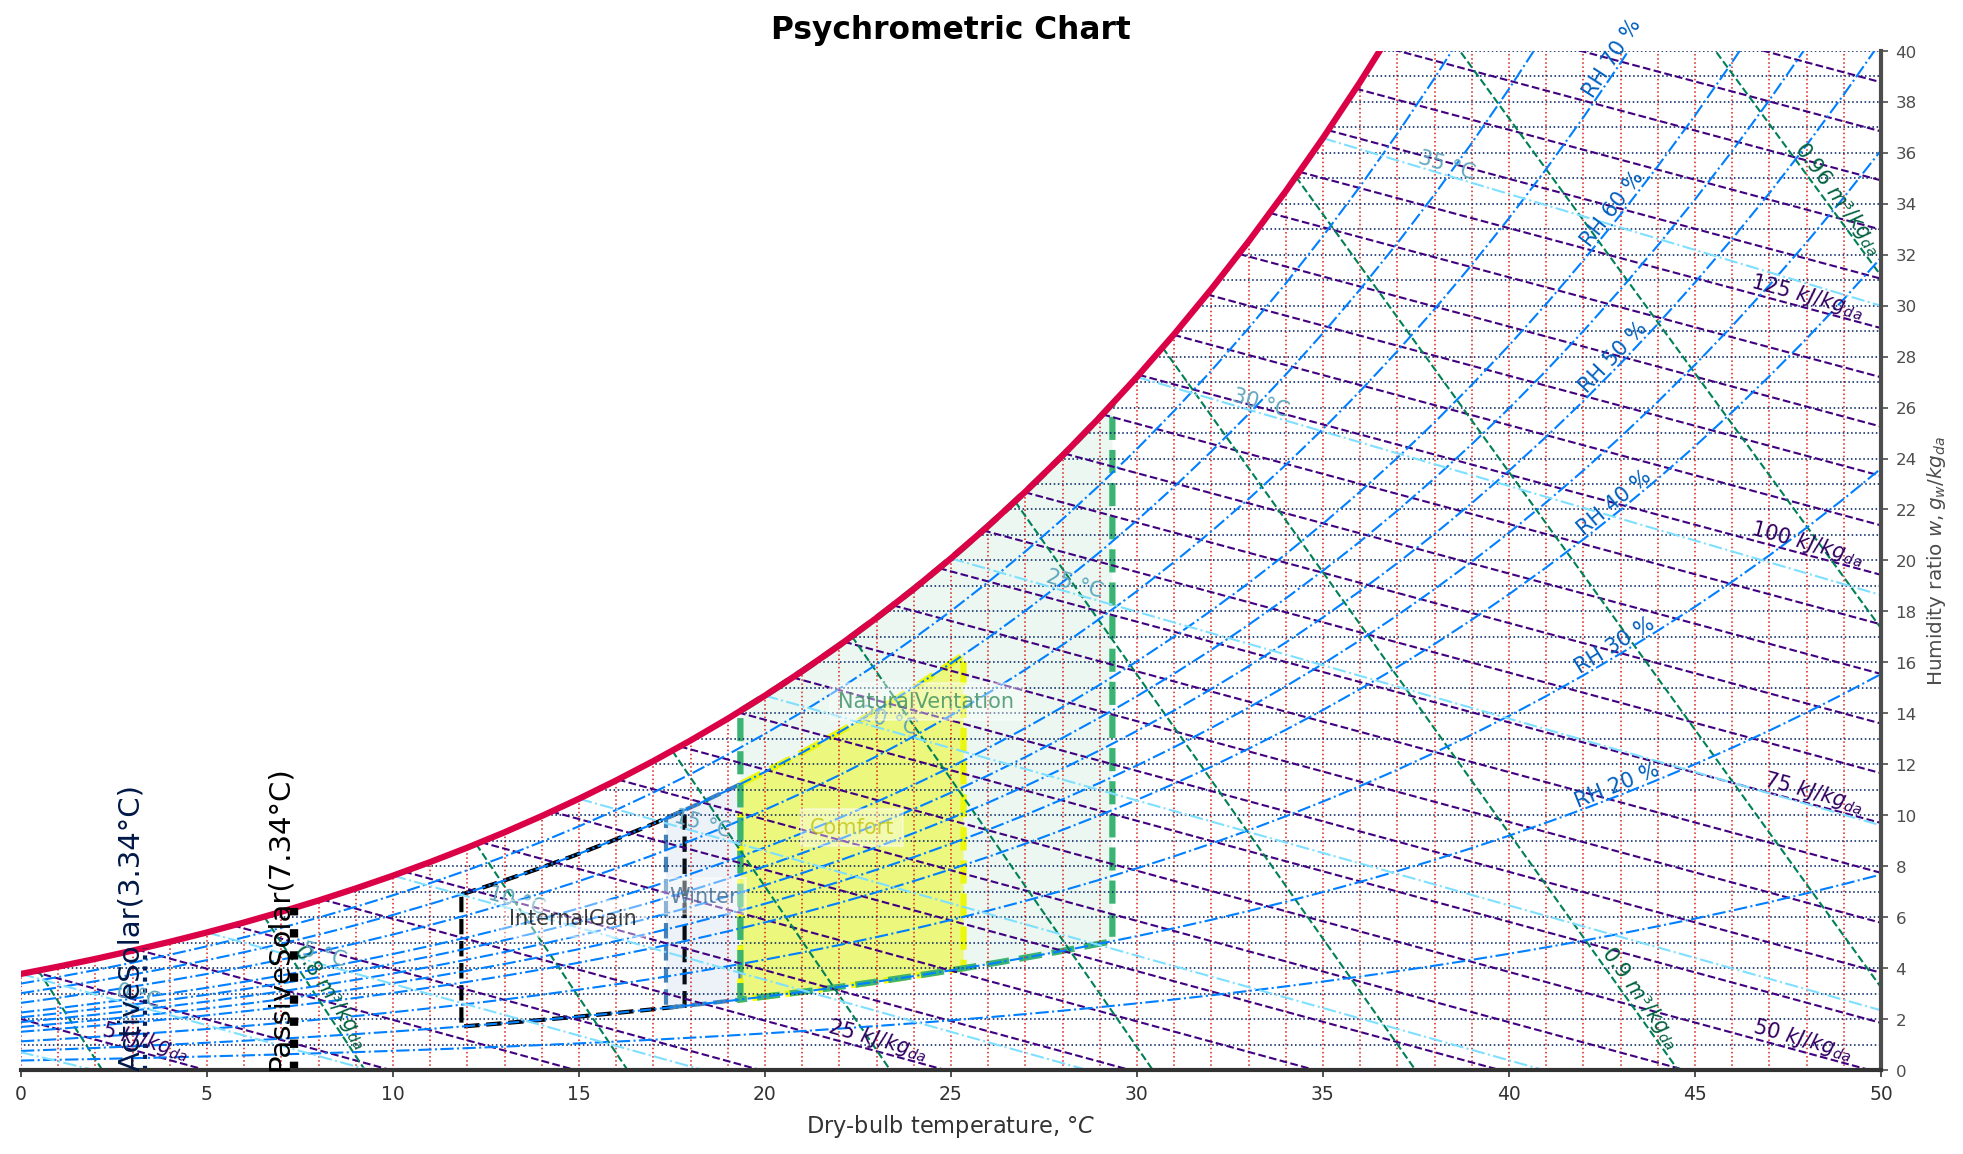

In [80]:
#EvaluateOutdoorPotencial
from psychrochart import PsychroChart
from psychrochart import load_zones
from psychrochart import load_config
config_style = load_config('default')
config_zone = load_zones()
config_zone['zones'].clear() # zoneリストの末尾のデータを削除
#CreateZone
zones_conf = {
    "zones":[{
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [0, 0, 0, 1],
                      "facecolor": [1, 1, 1, 0.1],
                      "linewidth": 2,
                      "linestyle": "--"},
            "points_x": [InternalGain, Winter],
            "points_y": [20, 80],
            "label": "InternalGain"
},
            {
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [0.275, 0.51, 0.71, 1],
                      "facecolor": [0.275, 0.51, 0.71, 0.1],
                      "linewidth": 2,
                      "linestyle": "--"},
            "points_x": [Winter,Com1],
            "points_y": [20, 80],
            "label": "Winter"
},
{
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [1.0, 1.0, 0.00, 1],
                      "facecolor": [1.0, 1.0, 0.00, 0.5],
                      "linewidth": 3,
                      "linestyle": "--"},
            "points_x": [Com1, ComHalf],
            "points_y": [20, 80],
            "label": "Comfort"
},
{
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [0.23, 0.70, 0.45, 1],
                      "facecolor": [0.23, 0.70, 0.45, 0.1],
                      "linewidth": 3,
                      "linestyle": "--"},
            "points_x": [Com1,NaturalHalf ],
            "points_y": [20,100],
            "label": "NaturalVentation"
} ]}
config_zone=zones_conf
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
# Add Vertical lines
chart.plot_vertical_dry_bulb_temp_line(
    ActiveSolar, {"color": [0.0, 0.125, 0.376], "lw": 2, "ls": ':'},
    'ActiveSolar({}°C)'.format(ActiveSolar), ha='left', loc=0., fontsize=14)
chart.plot_vertical_dry_bulb_temp_line(
    PassiveSolar, {"color": [0.0, 0.0, 0.0], "lw": 4, "ls": ':'},
    'PassiveSolar({}°C)'.format(PassiveSolar), ha='left', loc=0., fontsize=14)
ax.get_figure()
# chart.plot_vertical_dry_bulb_temp_line(
#     t_opt, {"color": [0.475, 0.612, 0.075], "lw": 2, "ls": ':'})
# chart.plot_vertical_dry_bulb_temp_line(
#     t_max, {"color": [1.0, 0.0, 0.247], "lw": 2, "ls": ':'},
#     'TOO HOT ({}°C)  '.format(t_max), ha='right', loc=1,
#     reverse=True, fontsize=14)

In [38]:
#EvaluateOutdoorPotencial
from psychrochart import PsychroChart
from psychrochart import load_zones
from psychrochart import load_config
config_style = load_config('default')
config_zone = load_zones()
config_zone['zones'].clear() # zoneリストの末尾のデータを削除
#CreateZone
zones_conf = {
    "zones":[
# {
#             "zone_type": "dbt-rh",
#             "style": {"edgecolor": [0, 0, 0, 1],
#                       "facecolor": [0.275, 0.51, 0.71, 0.1],
#                       "linewidth": 2,
#                       "linestyle": "--"},
#             "points_x": [Winter,Com1],
#             "points_y": [20, 80],
#             "label": "Winter"
# },
{
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [0, 0, 0, 1],
                      "facecolor": [1.0, 1.0, 0.00, 0.5],
                      "linewidth": 2,
                      "linestyle": "--"},
            "points_x": [Com1, ComHalf],
            "points_y": [20, 80],
            "label": "Comfort"
},
# {
#             "zone_type": "dbt-rh",
#             "style": {"edgecolor": [0, 0, 0, 1],
#                       "facecolor": [0.23, 0.70, 0.45, 0.1],
#                       "linewidth": 2,
#                       "linestyle": "--"},
#             "points_x": [Com1,NaturalHalf ],
#             "points_y": [20,100],
#             "label": "NaturalVentation"
# } 
]}
config_zone=zones_conf
chart = PsychroChart(config_style, config_zone)
points_style = {'s': 0.5, 'alpha': 0.8, 'color': 'darkorange'}
ax = chart.plot()
chart.plot_points_dbt_rh(points_array,scatter_style=points_style) #解析した結果はanalysisArray,屋外はpoints_array
# Add Vertical lines
chart.plot_vertical_dry_bulb_temp_line(
    ActiveSolar, {"color": [0.0, 0.125, 0.376], "lw": 2, "ls": ':'},
    'ActiveSolar({}°C)'.format(ActiveSolar), ha='left', loc=0., fontsize=14)
chart.plot_vertical_dry_bulb_temp_line(
    PassiveSolar, {"color": [0.0, 0.0, 0.0], "lw": 4, "ls": ':'},
    'PassiveSolar({}°C)'.format(PassiveSolar), ha='left', loc=0., fontsize=14)
#PlotPoint
points_style = {'s': 1, 'alpha': 0.8, 'color': 'darkorange'}
point = {'point1': {'label': 'point1',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (26, 60)}}
ax.get_figure()

NameError: name 'Com1' is not defined

In [ ]:
#EvaluateIndoorAnalysis
from psychrochart import PsychroChart
from psychrochart import load_zones
from psychrochart import load_config
config_style = load_config('default')
config_zone = load_zones()
config_zone['zones'].clear() # zoneリストの末尾のデータを削除
#CreateZone
zones_conf = {
    "zones":[{
            "zone_type": "dbt-rh",
            "style": {"edgecolor": [0, 0, 0, 1],
                      "facecolor": [1, 1, 1, 0.1],
                      "linewidth": 2,
                      "linestyle": "--"},
            "points_x": [17, 28],
            "points_y": [40, 70],
            "label": "ComfortZone"
}]}
config_zone=zones_conf
chart = PsychroChart(config_style, config_zone)
points_style = {'s': 0.5, 'alpha': 0.8, 'color': 'red'}
ax = chart.plot()
chart.plot_points_dbt_rh(analysisArray,scatter_style=points_style) #解析した結果はanalysisArray,屋外はpoints_array

#PlotPoint
points_style = {'s': 1, 'alpha': 0.8, 'color': 'darkorange'}
point = {'point1': {'label': 'point1',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (26, 60)}}
SayResult()
ax.get_figure()


In [ ]:
#一応これでCSVファイルは呼ぶことが出来る※xlsxファイルはまた別
csvdf=pd.read_csv("C:/Users/81803/Downloads/project_21.csv")
GenerateAr(csvdf,"Temperature")
Temp=GenerateAr(csvdf,"Temperature")
Humid=GenerateAr(csvdf,"Humidity")
analysisArray = {'points_series_name': (Temp, Humid)}
AcceptData = []
ExccedaTemp=[]
ExccedHumid=[]
LowTemp=[]
LowHumid=[]
#AcceotData
for i in range(len(Temp)):
    if 17<=Temp[i]<=28:
        if 40<=Humid[i]<=70:
            AcceptData.append([Temp[i],Humid[i]])
AnswerA=round((len(AcceptData)/len(Temp))*100,1)
#ExccedaTemp
for i in range(len(Temp)):
    if 28<Temp[i]:
        ExccedaTemp.append(Temp[i])
AnswerET=round((len(ExccedaTemp)/len(Temp))*100,1)
#LowTemp
for i in range(len(Temp)):
    if Temp[i]<17:
        LowTemp.append(Temp[i])
AnswerLT=round((len(LowTemp)/len(Temp))*100,1)
#ExccedHumid
for i in range(len(Humid)):
    if 70<Humid[i]:
        ExccedHumid.append(Humid[i])
AnswerEH=round((len(ExccedHumid)/len(Temp))*100,1)
#LowHumid
for i in range(len(Humid)):
    if Humid[i]<40:
        LowHumid.append(Humid[i])
AnswerLH=round((len(LowHumid)/len(Temp))*100,1)
print(f"年間において、この部屋の中で室内環境基準を満たすものは{AnswerA}%です。")
print(f"そのうち、28℃より大きいの温度となる領域は{AnswerET}%です。")
print(f"そのうち、28℃未満の温度となる領域は{AnswerLT}%です。")
print(f"そのうち、70%より大きいの湿度となる領域は{AnswerEH}%です。")
print(f"そのうち、40%未満の湿度となる領域は{AnswerLH}%です。")

In [39]:
def GenerateAr(df,roomId):
    df=df[roomId]
    array=[]
    for i in range(len(df.index)):
        array.append(df.iloc[i])
    return array

In [40]:
#PassiveSolarDirectGainLow/HighMassZone_____setting変更有
%matplotlib inline
from psychrochart import PsychroChart

from psychrochart import load_config
config_style = load_config('default')
from psychrochart import load_zones
config_zone = load_zones()
config_zone['zones'].clear()
points_style = {'s': 9, 'alpha': 0.8, 'color': 'darkorange'}
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
chart.plot_points_dbt_rh(GenerateMassPassiveGainArrays(), scatter_style=points_style)
ax.get_figure()

C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


NameError: name 'GenerateMassPassiveGainArrays' is not defined

In [41]:
#Natural Ventilation Cooling Zone_____setting変更有
%matplotlib inline
from psychrochart import PsychroChart

from psychrochart import load_config
config_style = load_config('default')
from psychrochart import load_zones
config_zone = load_zones()
config_zone['zones'].clear()
points_style = {'s': 9, 'alpha': 0.8, 'color': 'darkorange'}
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
chart.plot_points_dbt_rh(GenerateNaturalArrays(), scatter_style=points_style)
ax.get_figure()

C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


NameError: name 'GenerateNaturalArrays' is not defined

In [42]:
%matplotlib inline
from psychrochart import PsychroChart

from psychrochart import load_config
config_style = load_config('default')
from psychrochart import load_zones
config_zone = load_zones()
config_zone['zones'].clear()
points_style = {'s': 9, 'alpha': 0.8, 'color': 'darkorange'}
point = {'point1': {'label': 'point1',
                       'style': {'color': [0.85, 0.0, 0.0, 0.5],
                                 'marker': 'o', 
                                 'markersize': 10},
                       'xy': (26, 60)}}
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
chart.plot_points_dbt_rh(points_array,scatter_style=points_style)
ax.get_figure()

C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = self.figure.gca(position=position)


NameError: name 'points_array' is not defined

In [44]:
from pythermalcomfort.models import pmv_ppd
from pythermalcomfort.models import pmv
from pythermalcomfort.utilities import v_relative, clo_dynamic
#PMVチャート用の関数です。
#計測する乾球温度
temp=[]
for i in range(0,500,1):
    temp.append(i/10)

In [93]:
#室内環境の温度湿度の結果
def dfArray(df,roomId):
    df=df[roomId]
    array=[]
    for i in range(len(df.index)):
        array.append(df.iloc[i])
    return array
def Indoorplotresults(id):
    ResultData=getResultData(id)
    tempdictdf=dataFrameByKey(ResultData,"temp")
    humiditydf=dataFrameByKey(ResultData,"relHumidity")
    Allresult=[]
    for roomId in tempdictdf.keys():
        if roomId != "outdoor":
            IndoorResult={"roomId":{},'points_series_name':{}}
            IndoorResult["roomId"]=roomId
            Temp=dfArray(tempdictdf,roomId)
            Humid=dfArray(humiditydf,roomId)
            IndoorResult['points_series_name']=(Temp,Humid)
            Allresult.append(IndoorResult)
    return Allresult
#             IndoorResult["roomId"]=roomId
#             IndoorResult['points_series_name']=analysisArray
#             Allresult.append(IndoorResult)

In [113]:
def Indoorplotresults(id):
    ResultData=getResultData(id)
    tempdictdf=dataFrameByKey(ResultData,"temp")
    humiditydf=dataFrameByKey(ResultData,"relHumidity")
    Allresult=[]
    for roomId in tempdictdf.keys():
        if roomId != "outdoor":
            IndoorResult={"roomId":{},'points':{}}
            Temp=dfArray(tempdictdf,roomId)
            Humid=dfArray(humiditydf,roomId)
            analysisArray = (Temp, Humid)
            IndoorResult["roomId"]=roomId
            IndoorResult['points']=analysisArray
            Allresult.append(IndoorResult)
    return Allresult

In [116]:
len(Indoorplotresults(10))

3

In [45]:
#空箱にどんどん追加させるから、その側にあったらそこに追加させるからDef文の中に入れとかないと中務が更新されない。
def PMVChart(rh,ev):
    num=[]
    pmvc=[]
    #    print (tempDict[roomId])
    #    print (humidityDict[roomId])
    tdb = temp
    tr = temp
    rh = rh   
    v = 0.05
    met = 1
    clo = 1.0
    v_r = v_relative(v=v, met=met)
    # calculate dynamic clothing
    clo_d = clo_dynamic(clo=clo, met=met)
    results = pmv(tdb=tdb, tr=tr, vr=v_r, rh=rh, met=met, clo=clo_d, limit_inputs=False)
    pmvc.append(results) 
    a=np.abs(pmvc)<=ev
    a=np.where(a==True)[1]
    a=a.tolist()
    num.append(temp[min(a)])
    num.append(temp[max(a)])
    return num

In [46]:
from pythermalcomfort.models import set_tmp
def SETChart(rh,w):
    num=[]
    setc=[]
    #    print (tempDict[roomId])
    #    print (humidityDict[roomId])
    tdb = temp
    tr = temp
    rh = rh   
    v = 0.05
    met = 1
    clo = 0.6
    v_r = v_relative(v=v, met=met)
    # calculate dynamic clothing
    #clo_d = clo_dynamic(clo=clo, met=met)
    results=set_tmp(tdb=tdb, tr=tr, v=v_r, rh=rh, met=met, clo=clo,limit_inputs=False)
    setc.append(results)
    a=np.array(setc)
    if w == "win":
        a=np.where((a<=23.5)&(a>20))[1]
    else:
        a=np.where((a<=26)&(a>23))[1]
    a=a.tolist()
    num.append(temp[min(a)])   
    num.append(temp[max(a)])
    return num

C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=8>
  return process_handler(cmd, _system_body)
C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=9>
  return process_handler(cmd, _system_body)
C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=10>
  return process_handler(cmd, _system_body)
C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.su

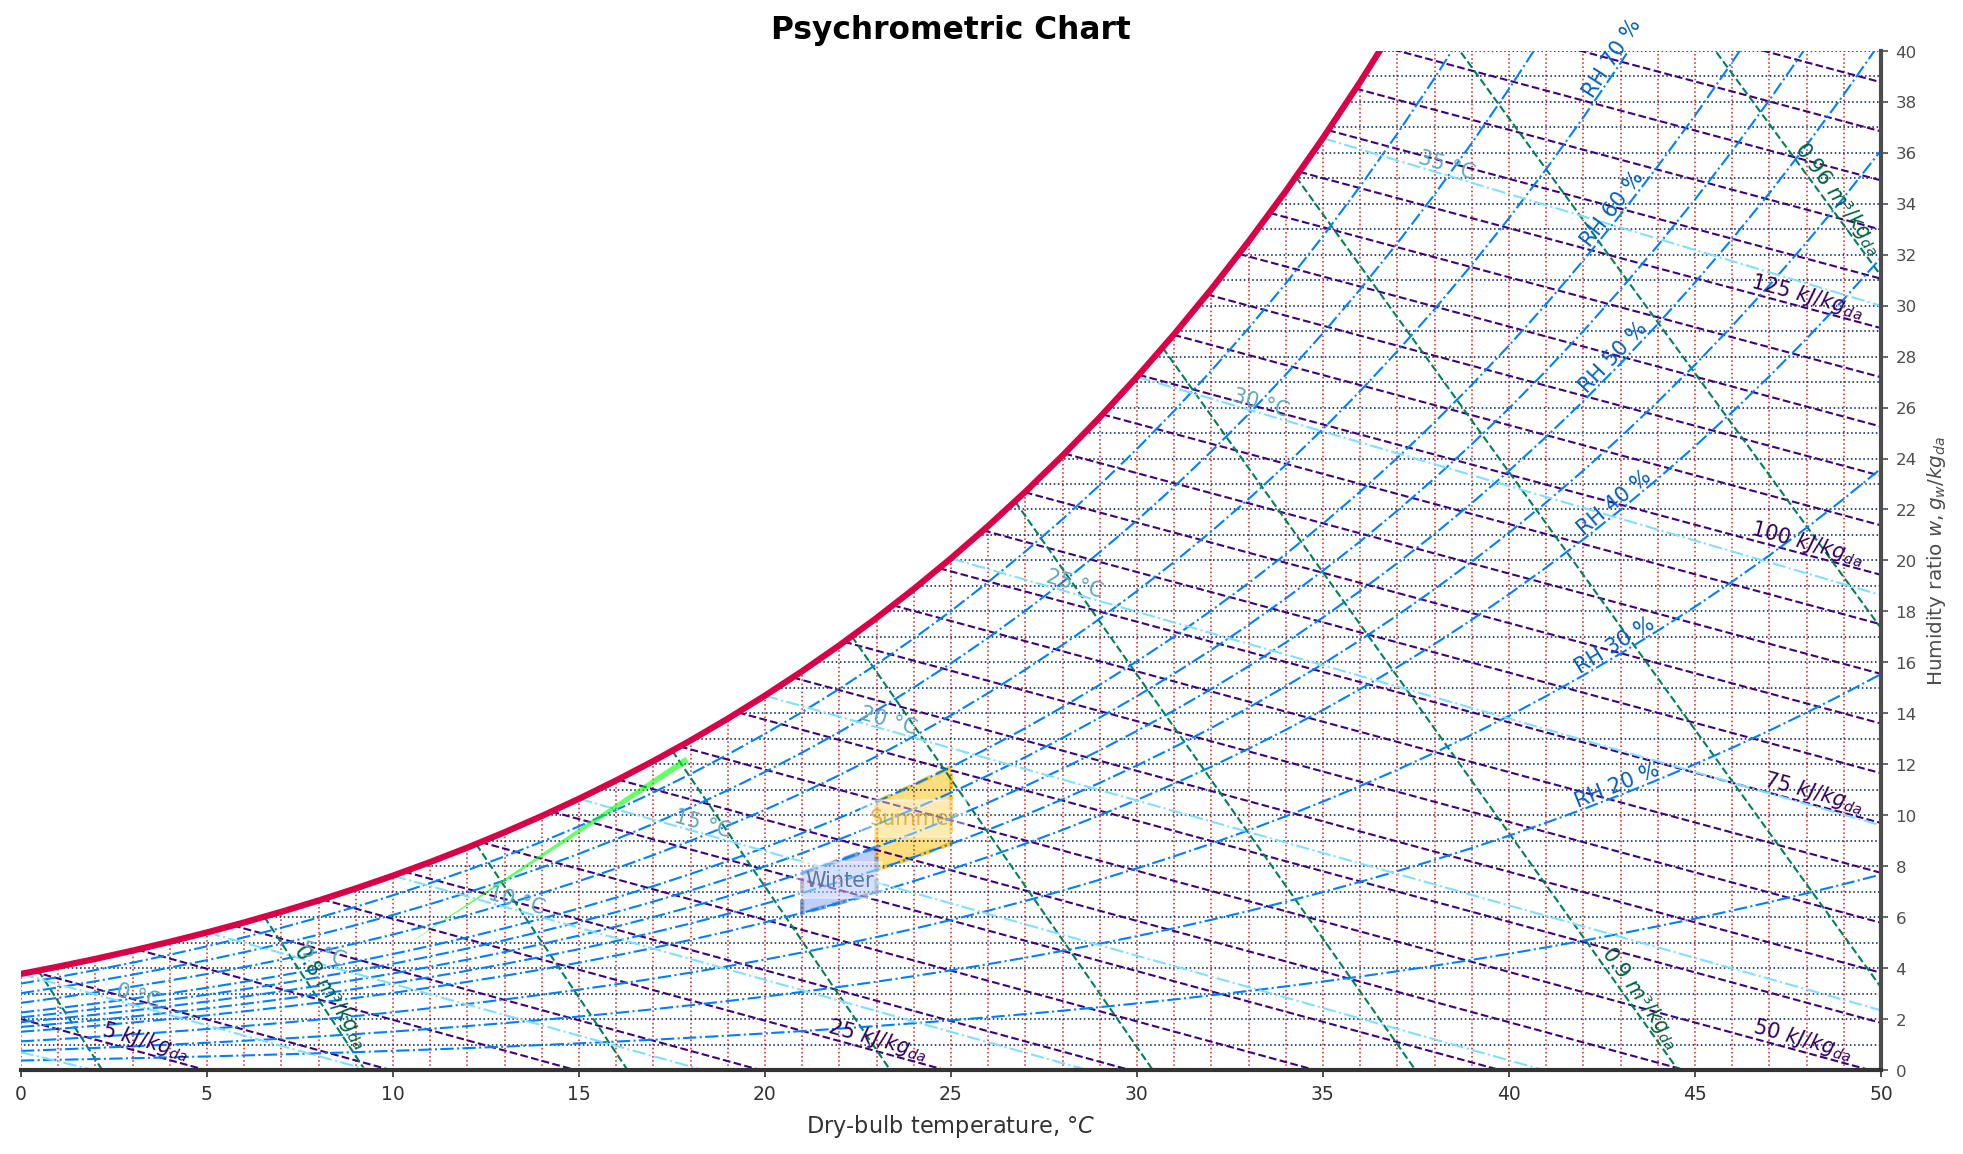

In [47]:
from psychrochart import PsychroChart
from psychrochart import load_config
from psychrochart import load_zones
!pip install matplotlib
#chart_default = PsychroChart('default')
config_style = load_config('default')
#ゾーンを算出する
config_zone = load_zones()
#矢印のプロット
points_pair =  {
                'wedgea2': {'label': 'wedgeA2',
                       'style': {'color': [0.0, 1.0, 0.0],"arrowstyle": "-"},
                       'xy': [(18, 95), (10, 60)]}
                }
chart = PsychroChart(config_style, config_zone)
ax = chart.plot()
chart.plot_arrows_dbt_rh(points_pair)
ax.get_figure()

C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=10>
  return process_handler(cmd, _system_body)
C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=11>
  return process_handler(cmd, _system_body)
C:\Users\81803\anaconda3\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=12>
  return process_handler(cmd, _system_body)
C:\Users\81803\anaconda3\lib\site-packages\psychrochart\chart.py:533: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.

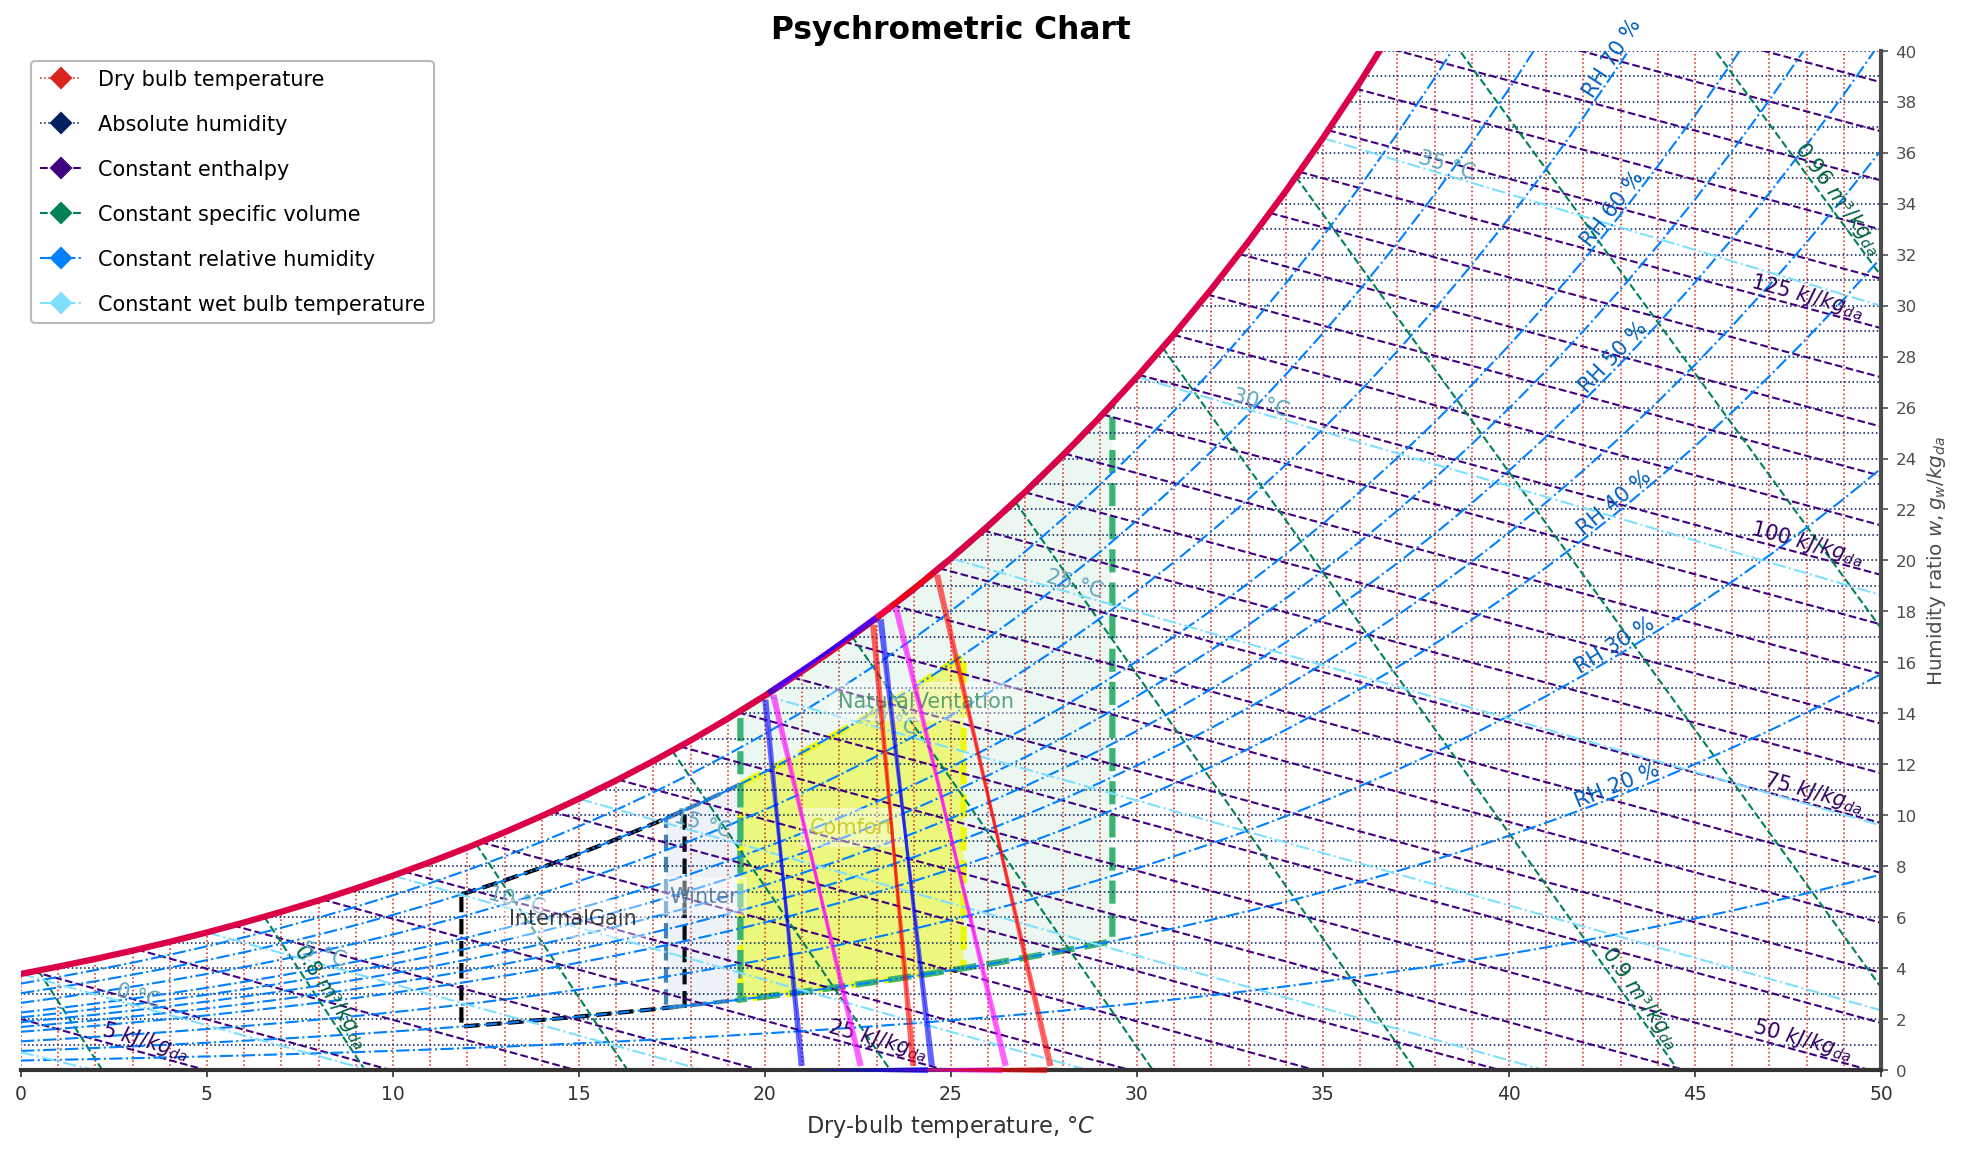

In [84]:
from psychrochart import PsychroChart
from psychrochart import load_config
from psychrochart import load_zones
!pip install matplotlib
chart_default = PsychroChart('default')
config_style = load_config('default')
#ゾーンを算出する
config_zone = load_zones()
config_zone['zones'].pop()
#四角のプロット_PMV,SET*について
points_pair = {}
#PMVについて
points_pair = pla((PMVChart(0,0.5)[0],0),(PMVChart(0,0.5)[1],0),(PMVChart(100,0.5)[0],100),(PMVChart(100,0.5)[1],100),[1.0, .0, 1.0])
#SETについて
points_pair = points_pair | pla((SETChart(0,"win")[0],0),(SETChart(0,"win")[1],0),(SETChart(100,"win")[0],100),(SETChart(100,"win")[1],100),[0, 0, 1.0])
points_pair = points_pair | pla((SETChart(0,"sum")[0],0),(SETChart(0,"sum")[1],0),(SETChart(100,"sum")[0],100),(SETChart(100,"sum")[1],100),[1.0, 0, 0])
#
ax = chart.plot()
chart.plot_arrows_dbt_rh(points_pair)
#legendバーをつけるが矢印には適応することが出来ない。
chart.plot_legend(markerscale=.7, frameon=True, fontsize=10, labelspacing=1.2)
ax.get_figure()

In [50]:
(SETChart(0,"sum")[0],0),(SETChart(0,"sum")[1],0),(SETChart(100,"sum")[0],100),(SETChart(100,"sum")[1],100)

((24.0, 0), (27.7, 0), (22.9, 100), (24.6, 100))

In [49]:
def pla(A,B,C,D,E):
#pla((PMVChart(0,0.5)[0],0),(PMVChart(0,0.5)[1],0),(PMVChart(100,0.5)[0],100),(PMVChart(100,0.5)[1],100),[0.0, 0.0, 0.0])
    a1={}
    a= {'label': 'wedgeA1','style': {'color':E,"arrowstyle": "-"},'xy': [A,C]}
    b= {'label': 'wedgeA2','style': {'color':E,"arrowstyle": "-"},'xy': [C,A]}
    c= {'label': 'wedgeA3','style': {'color':E,"arrowstyle": "-"},'xy': [B,D]}
    d= {'label': 'wedgeA4','style': {'color':E,"arrowstyle": "-"},'xy': [D,B]}
    e= {'label': 'wedgeA1','style': {'color':E,"arrowstyle": "-"},'xy': [C,A]}
    f= {'label': 'wedgeA1','style': {'color':E,"arrowstyle": "-"},'xy': [B,A]}
    g= {'label': 'wedgeA1','style': {'color':E,"arrowstyle": "-"},'xy': [C,D]}
    h= {'label': 'wedgeA1','style': {'color':E,"arrowstyle": "-"},'xy': [D,C]}
    #要素を追加
    a1[str(A)+str(C)]=a
    a1[str(C)+str(A)]=b
    a1[str(B)+str(D)]=c
    a1[str(D)+str(B)]=d
    a1[str(C)+str(A)]=e
    a1[str(B)+str(A)]=f
    a1[str(C)+str(D)]=g
    a1[str(D)+str(C)]=h
    return a1

In [ ]:
# from psychrochart import PsychroChart
# from psychrochart import load_zones
# chart_default = PsychroChart('default')
# from psychrochart import load_config
# import matplotlib.pyplot as plt
# config_style = load_config('default')
# #plotする
# #領域の情報の公開
# config_zone = load_zones()
# # 末尾にデータを追加
# #config_zone['zones'].append(config_zone['zones'][0].copy())

# config_zone['zones'].pop() # リストの末尾のデータを削除
# config_zone['zones'].pop()
# #追加したデータの設定01(今後はこれを増やす予定)
# point = {'point1': {'label': 'point1',
#                        'style': {'color': [0.85, 0.0, 0.0, 0.5],
#                                  'marker': 'o', 
#                                  'markersize': 10},
#                        'xy': (PMVChart(0,0.5)[0], 0)},
#          'point2': {'label': 'point2',
#                        'style': {'color': [0.85, 0.0, 0.0, 0.5],
#                                  'marker': 'o', 
#                                  'markersize': 10},
#                        'xy': (PMVChart(0,0.5)[1], 0)},
#          'point3': {'label': 'point3',
#                        'style': {'color': [0.85, 0.0, 0.0, 0.5],
#                                  'marker': 'o', 
#                                  'markersize': 10},
#                        'xy': (PMVChart(100,0.5)[0], 100)},
#          'point4': {'label': 'point4',
#                        'style': {'color': [0.85, 0.0, 0.0, 0.5],
#                                  'marker': 'o', 
#                                  'markersize': 10},
#                        'xy': (PMVChart(100,0.5)[1], 100)}}

# connectors = [{'start': 'point1',
#                'end': 'point3',
#                'label': 'Process 1',
#                'style': {'color': [0.573, 0.106, 0.318, 0.7],
#                          "linewidth": 2, "linestyle": "-."}},
#               {'start': 'point2',
#                'end': 'point4',
#                'label': 'Process 2',
#                'style': {'color': [0.855, 0.145, 0.114, 0.8],
#                          "linewidth": 2, "linestyle": "-."}}]
# #ここでチャートの描画
# chart = PsychroChart(config_style, config_zone)
# ax = chart.plot()
# ##ボアボアの線を引きたかったらこれを使ってね
# chart.plot_points_dbt_rh(point, connectors)
# #legendバーをつける
# chart.plot_legend(markerscale=.7, frameon=False, fontsize=10, labelspacing=1.2)
# ax.get_figure()

In [51]:
#--Natural Ventation Zoneを満たす配列の空間の設定--------------------------------
def GenerateNaturalArrays():
    from ladybug.epw import EPW
    from pandas import DataFrame
    from collections import OrderedDict
    #Path to epw file.
    epw=EPW("C:/epw_file/JPN_FO_Fukuoka.478070_TMYx.epw")
    # die(epw)[::-1] to get data names
    data = ["dry_bulb_temperature","dew_point_temperature","relative_humidity","wind_speed"]
    epwdf = pd.DataFrame({d:getattr(epw,d).values for d in data})
    #一日ごとにデータ抽出
    a=[]
    for i in range(365):
        b=[]
        for u in range(0,25,24):
            Datenumber = i*24+u
            b.append(Datenumber)
        a.append(b)
    c=[]
    for day in a:
        df=epwdf[day[0]:day[-1]]
#Natural Ventilation Cooling Zone.Setting----------------------------------------
        u=df["dry_bulb_temperature"].max()-df["dry_bulb_temperature"].min()
        if u<1.7 or u>16.7:
            c.append("True")
        else:
            c.append("False")
#--------------------------------------------------------------------------------
    d=[i for i,x in enumerate(c) if x== "True"]
    Indexnumber=[]
    for days in d:
        Indexnumber.append(a[days])
#seriesの順に並べる。
    e=[]
    for numbers in  Indexnumber:
        for i in range(numbers[0],numbers[1],1):
            e.append(i)
    Naturaldf=epwdf.loc[e,:]
    a=GenerateAr(Naturaldf,"dry_bulb_temperature")
    b=GenerateAr(Naturaldf,"relative_humidity")
    points_array = {'points_series_name': (a, b)}
    return points_array

In [52]:
 #--High Thermal Mass Zoneを満たす配列の空間の設定--------------------------------
from ladybug.epw import EPW
from pandas import DataFrame
from collections import OrderedDict
#Path to epw file.
epw=EPW("C:/epw_file/JPN_FO_Fukuoka.478070_TMYx.epw")
# die(epw)[::-1] to get data names
data = ["dry_bulb_temperature","dew_point_temperature","relative_humidity","wind_speed"]
epwdf = pd.DataFrame({d:getattr(epw,d).values for d in data})
#Passive Solar Direct Gain Low/High Mass Zone.Setting----------------------------------------
a=[]
for i in range(8758):
    b=[i,i+1,i+2,i+3]
    a.append(b)                                #print(a) #[1, 2, 3]
c=[]
for day in a:
    df=epwdf[day[0]:day[-1]]
    udf=df["dry_bulb_temperature"]
    uindex = udf.values[-3]              #ここの値も変更
    u=udf.max()-uindex
    print(udf.max(),uindex)
    if u>5.56:
        c.append("True")
    else:
        c.append("False")
#---------------------------------------------------------------------------------------------
d=[i for i,x in enumerate(c) if x== "True"]
Indexnumber=[]
for days in d:
    Indexnumber.append(a[days])
#seriesの順に並べる。
e=[]
for numbers in  Indexnumber:
    for i in range(numbers[0],numbers[1],1):
        e.append(i)
Naturaldf=epwdf.loc[e,:]
Naturaldf
a=GenerateAr(Naturaldf,"dry_bulb_temperature")
b=GenerateAr(Naturaldf,"relative_humidity")
points_array = {'points_series_name': (a, b)}
#print (points_array)

9.9 9.9
6.9 6.7
7.2 6.8
7.4 6.9
7.4 7.2
7.4 7.4
7.4 7.2
7.4 7.4
7.8 7.0
8.1 7.2
8.7 7.8
9.0 8.1
9.0 8.7
10.1 9.0
10.1 9.0
10.1 10.1
9.4 9.4
8.7 8.6
8.7 8.7
8.0 8.0
7.5 7.5
7.2 7.0
7.3 7.0
7.4 7.2
8.8 7.3
8.8 7.4
8.8 8.8
8.6 8.6
9.4 8.4
9.4 8.4
9.4 9.4
8.4 8.3
8.4 8.4
10.7 8.0
10.7 7.9
11.2 10.7
11.3 10.7
11.3 11.2
11.3 11.3
10.6 10.6
10.3 10.3
9.9 9.9
9.5 9.5
9.2 9.2
8.8 8.8
8.7 8.7
8.6 8.6
8.4 8.4
8.0 7.9
8.0 7.5
8.0 8.0
7.3 7.3
6.9 6.9
6.7 6.7
6.5 6.5
6.4 6.4
6.6 6.0
6.7 6.2
6.7 6.6
8.0 6.7
8.0 6.7
8.0 8.0
6.9 6.6
7.2 6.9
7.2 6.4
7.2 7.2
6.4 5.9
6.7 5.9
6.7 6.4
6.7 6.7
7.1 6.7
7.1 6.7
7.1 7.1
6.9 6.9
6.9 6.5
6.9 6.9
6.9 6.9
6.5 6.5
6.0 6.0
5.8 5.8
5.8 5.7
5.8 5.6
6.1 5.8
6.1 5.8
6.1 6.1
6.7 5.9
6.7 5.8
6.7 6.7
6.3 6.3
5.4 5.4
5.2 5.2
4.8 4.8
4.8 4.7
4.8 4.8
4.7 4.7
3.0 2.8
3.0 3.0
2.6 2.6
1.3 1.3
1.1 1.1
1.1 1.1
1.0 0.8
1.3 1.0
1.6 1.0
3.3 1.3
6.2 1.6
7.8 3.3
7.8 6.2
8.6 7.8
8.6 7.6
8.6 8.6
8.1 8.1
7.6 7.6
7.2 7.2
6.9 6.9
6.8 6.6
6.8 6.6
6.8 6.8
5.5 5.5
5.0 5.0
4.9 4.9
4.1 4.1
3.7 3.

9.0 9.0
8.7 8.7
8.3 8.3
8.1 8.1
8.0 8.0
7.8 7.8
7.6 7.6
7.4 7.4
7.6 7.2
7.8 7.4
8.0 7.6
8.1 7.8
8.3 8.0
9.4 8.1
10.6 8.3
11.7 9.4
12.2 10.6
12.8 11.7
13.3 12.2
13.7 12.8
14.0 13.3
14.4 13.7
14.4 14.0
14.4 14.4
13.7 13.7
12.9 12.9
12.2 12.2
11.3 11.3
10.3 10.3
9.8 9.4
10.0 9.6
10.0 9.8
10.0 10.0
9.6 9.6
9.3 9.3
8.9 8.9
8.0 8.0
8.0 7.0
9.8 6.1
11.7 8.0
13.2 9.8
14.6 11.7
16.1 13.2
16.3 14.6
16.5 16.1
16.7 16.3
16.7 16.5
16.7 16.7
15.6 15.6
14.4 14.4
13.3 13.3
12.0 12.0
10.7 10.7
9.4 9.4
9.0 9.0
8.7 8.7
8.3 8.3
8.3 8.3
8.3 8.3
8.3 8.3
8.3 8.3
8.9 8.3
9.4 8.3
10.0 8.9
12.0 9.4
14.1 10.0
16.1 12.0
16.1 14.1
16.1 16.1
15.5 15.5
15.0 15.0
14.4 14.4
13.9 13.9
13.3 13.3
12.8 12.8
12.2 12.2
11.7 11.7
11.1 11.1
10.9 10.9
10.8 10.8
10.6 10.6
10.2 10.2
9.8 9.8
9.4 9.4
8.7 8.7
8.3 7.9
9.5 7.2
10.6 8.3
12.3 9.5
13.9 10.6
15.6 12.3
16.1 13.9
16.7 15.6
17.2 16.1
17.2 16.7
17.2 17.2
17.0 17.0
16.9 16.9
16.7 16.7
16.5 16.5
16.3 16.3
16.1 16.1
15.5 15.5
15.0 15.0
14.4 14.4
13.9 13.9
13.5 13.3
14.3 12.8
15

20.0 20.0
20.0 20.0
20.0 20.0
20.0 20.0
20.3 20.0
20.7 20.0
21.0 20.3
21.3 20.7
21.7 21.0
22.0 21.3
22.3 21.7
22.7 22.0
23.0 22.3
23.0 22.7
23.0 23.0
23.0 23.0
23.3 23.0
23.7 23.0
24.0 23.3
24.0 23.7
24.0 24.0
23.0 23.0
22.0 22.0
21.0 21.0
20.7 20.7
20.3 20.3
20.0 20.0
18.7 18.7
17.3 17.3
16.0 16.0
15.7 15.7
15.3 15.3
15.0 15.0
14.7 14.7
14.3 14.3
14.0 14.0
13.7 13.7
13.3 13.3
13.7 13.0
14.0 13.3
14.0 13.7
14.0 14.0
14.0 14.0
14.0 14.0
14.0 14.0
13.3 13.3
12.7 12.7
12.0 12.0
11.7 11.7
11.3 11.3
11.0 11.0
10.7 10.7
10.3 10.3
10.0 10.0
10.0 10.0
11.3 10.0
12.7 10.0
14.0 11.3
14.7 12.7
15.3 14.0
16.0 14.7
16.0 15.3
16.0 16.0
15.3 15.3
14.7 14.7
15.3 14.0
16.0 14.7
16.0 15.3
16.0 16.0
15.0 15.0
14.0 14.0
13.0 13.0
12.7 12.7
12.3 12.3
12.0 12.0
11.3 11.3
10.7 10.7
10.0 10.0
9.7 9.7
9.7 9.3
10.3 9.0
11.0 9.7
11.7 10.3
12.3 11.0
13.0 11.7
13.3 12.3
13.7 13.0
14.0 13.3
14.0 13.7
14.0 14.0
13.3 13.3
12.7 12.7
12.0 12.0
11.7 11.7
11.3 11.3
11.0 11.0
11.0 11.0
11.0 11.0
11.0 11.0
11.0 11.0
11.0 1

23.7 22.2
24.4 22.9
24.4 23.7
24.4 24.4
24.4 24.4
24.4 24.4
24.4 24.4
23.9 23.9
23.3 23.3
22.8 22.8
21.7 21.7
20.5 20.5
19.4 19.4
18.5 18.5
17.6 17.6
16.7 16.7
15.9 15.9
15.2 15.2
14.4 14.4
13.9 13.9
16.1 13.3
19.5 12.8
22.8 16.1
23.9 19.5
25.0 22.8
26.1 23.9
26.1 25.0
26.1 26.1
25.9 25.9
25.8 25.8
25.6 25.6
24.7 24.7
23.7 23.7
22.8 22.8
22.1 22.1
21.3 21.3
20.6 20.6
19.7 19.7
18.7 18.7
17.8 17.8
17.1 17.1
16.3 16.3
15.6 15.6
15.2 15.2
17.6 14.8
20.7 14.4
23.9 17.6
25.2 20.7
26.5 23.9
27.8 25.2
27.8 26.5
27.8 27.8
27.6 27.6
27.4 27.4
27.2 27.2
26.1 26.1
25.0 25.0
23.9 23.9
23.2 23.2
22.4 22.4
21.7 21.7
21.5 21.5
21.3 21.3
21.1 21.1
20.7 20.7
20.4 20.4
20.0 20.0
19.8 19.8
20.5 19.6
21.7 19.4
22.8 20.5
23.0 21.7
23.1 22.8
23.3 23.0
23.7 23.1
24.0 23.3
24.4 23.7
24.8 24.0
25.2 24.4
25.6 24.8
25.6 25.2
25.6 25.6
25.2 25.2
24.8 24.8
24.4 24.4
24.0 24.0
23.7 23.7
23.3 23.3
23.3 23.3
23.3 23.3
23.3 23.3
22.8 22.8
22.2 22.2
21.7 21.7
21.7 21.7
21.7 21.7
21.7 21.7
21.7 21.7
21.7 21.7
21.7 21.7


28.6 28.6
28.2 28.2
27.8 27.8
27.6 27.6
27.3 27.3
26.7 26.7
26.5 26.5
26.3 26.3
25.7 25.7
26.2 25.7
28.1 25.3
28.8 26.2
29.4 28.1
30.9 28.8
31.3 29.4
32.7 30.9
32.7 31.3
32.7 32.7
32.1 32.1
31.6 31.6
30.9 30.9
30.2 30.2
29.6 29.6
28.8 28.8
28.8 28.5
28.8 28.8
28.6 28.6
28.6 28.6
28.3 28.3
28.0 28.0
27.5 27.5
27.0 27.0
26.8 26.8
26.9 26.6
28.4 26.4
29.6 26.9
30.2 28.4
30.7 29.6
31.1 30.2
31.7 30.7
31.7 31.1
31.7 31.7
31.4 30.8
31.4 31.3
31.4 31.4
30.6 30.6
30.1 30.1
29.1 29.1
28.6 28.6
28.6 28.4
28.6 28.5
28.6 28.6
28.5 28.5
28.4 28.4
28.1 28.1
27.8 27.8
27.7 27.7
27.3 26.6
28.8 26.7
30.4 27.3
31.5 28.8
32.3 30.4
32.3 31.5
32.3 32.3
32.0 31.9
32.3 32.0
32.3 31.8
32.3 32.3
31.8 31.0
31.8 31.8
30.6 30.6
30.2 30.2
29.7 29.7
28.7 28.7
27.8 27.8
27.0 27.0
26.2 26.2
25.9 25.9
25.6 25.6
26.0 25.4
26.0 25.4
26.1 26.0
27.4 25.2
28.8 26.1
28.9 27.4
29.1 28.8
29.4 28.9
30.7 29.1
30.7 29.4
30.7 30.7
30.3 30.3
29.8 29.8
29.5 29.3
29.5 29.5
29.0 28.8
29.0 28.7
29.0 29.0
27.8 27.8
27.4 27.4
27.4 27.4


26.7 26.7
26.5 26.1
26.7 26.3
26.7 26.5
26.7 26.7
26.7 26.7
26.7 26.7
26.7 26.7
26.3 26.3
26.5 26.0
27.4 25.6
28.3 26.5
28.3 27.4
28.3 28.3
27.8 27.8
27.2 27.2
27.4 26.7
27.8 27.1
27.8 27.4
27.8 27.8
27.4 27.4
27.1 27.1
26.7 26.7
26.1 26.1
25.6 25.6
25.0 25.0
24.6 24.6
24.3 24.3
23.9 23.9
23.7 23.7
23.5 23.5
23.3 23.3
23.1 23.1
24.1 23.0
25.4 22.8
26.7 24.1
28.5 25.4
30.4 26.7
32.2 28.5
32.2 30.4
32.2 32.2
32.0 32.0
31.9 31.9
31.7 31.7
30.8 30.8
29.8 29.8
28.9 28.9
28.0 28.0
27.0 27.0
26.1 26.1
25.7 25.7
25.4 25.4
25.0 25.0
24.6 24.6
24.3 24.3
23.9 23.9
23.7 23.7
25.3 23.5
27.4 23.3
29.4 25.3
30.7 27.4
32.0 29.4
33.3 30.7
33.3 32.0
33.3 33.3
33.3 33.3
33.3 33.3
33.3 33.3
32.4 32.4
31.5 31.5
30.6 30.6
29.7 29.7
28.7 28.7
27.8 27.8
27.2 27.2
26.7 26.7
26.1 26.1
25.5 25.5
25.0 25.0
24.4 24.4
24.0 24.0
23.9 23.7
24.4 23.3
25.0 23.9
25.6 24.4
26.1 25.0
26.7 25.6
26.7 26.1
26.7 26.7
26.7 26.7
26.7 26.7
26.7 26.7
26.5 26.5
26.3 26.3
26.1 26.1
25.7 25.7
25.4 25.4
25.0 25.0
24.6 24.6
24.3 24.3


19.4 16.6
20.7 18.1
21.2 19.4
21.5 20.7
21.9 21.2
21.9 21.5
21.9 21.9
21.6 21.6
20.9 20.9
20.5 20.5
19.9 19.9
18.4 18.4
17.5 17.5
17.1 17.1
16.9 16.9
16.7 16.5
16.7 16.7
16.7 16.7
16.6 16.6
16.5 16.5
16.5 16.4
16.5 16.5
17.0 16.5
17.6 16.5
18.1 17.0
19.0 17.6
20.1 18.1
20.6 19.0
21.5 20.1
21.5 20.6
21.5 21.5
20.9 20.9
20.4 20.4
19.4 19.4
18.8 18.8
18.0 18.0
17.2 17.2
16.1 16.1
15.9 15.3
15.9 15.9
14.9 14.8
14.9 14.9
14.3 14.2
14.3 14.3
13.6 13.0
14.2 13.6
16.8 12.8
19.0 14.2
20.2 16.8
21.0 19.0
21.0 20.2
21.0 21.0
21.0 21.0
20.9 20.9
19.7 19.7
19.0 19.0
18.1 18.1
17.5 17.5
16.8 16.8
15.9 15.9
15.6 15.6
14.2 14.2
13.4 13.4
12.9 12.4
12.9 12.9
12.7 12.5
13.1 12.7
13.6 12.6
13.6 13.1
13.7 13.6
15.2 13.3
17.3 13.7
18.8 15.2
20.4 17.3
22.2 18.8
22.2 20.4
22.2 22.2
21.7 21.5
21.8 21.7
22.0 21.7
22.0 21.8
22.0 22.0
21.9 21.9
20.6 20.6
20.6 20.6
19.7 19.5
19.7 19.7
19.3 19.3
19.1 19.1
18.7 18.7
17.7 17.7
16.4 16.4
16.1 16.1
15.6 15.6
16.1 15.0
16.1 14.9
16.1 16.1
15.7 15.1
15.7 15.6
15.7 15.7


4.8 4.8
5.2 4.7
5.6 4.7
6.6 5.2
6.6 5.6
6.6 6.6
6.6 6.6
6.8 6.6
7.1 6.6
7.3 6.8
7.3 7.1
7.3 7.3
7.1 7.1
6.9 6.9
6.7 6.7
6.3 6.3
5.8 5.8
5.4 5.4
5.0 5.0
4.5 4.5
4.1 4.1
3.9 3.9
3.7 3.7
3.5 3.5
3.4 3.4
4.1 3.2
5.1 3.1
5.5 4.1
6.8 5.1
8.2 5.5
9.5 6.8
9.8 8.2
10.0 9.5
10.3 9.8
10.3 10.0
10.3 10.3
9.9 9.9
9.4 9.4
9.0 9.0
8.5 8.5
8.0 8.0
7.5 7.5
7.4 7.4
7.3 7.3
7.4 7.2
7.5 7.3
7.8 7.4
8.2 7.5
8.5 7.8
8.5 8.2
8.5 8.5
7.8 7.7
8.2 6.9
8.6 7.8
9.0 8.2
9.3 8.6
9.7 9.0
10.0 9.3
10.0 9.7
10.0 10.0
10.0 10.0
10.0 10.0
10.0 10.0
10.0 10.0
10.0 10.0


In [85]:
 #--High Thermal Mass Zoneを満たす配列の空間の設定--------------------------------
def GenerateMassPassiveGainArrays():
    from ladybug.epw import EPW
    from pandas import DataFrame
    from collections import OrderedDict
    #Path to epw file.
    epw=EPW("C:/epw_file/JPN_FO_Fukuoka.478070_TMYx.epw")
    # die(epw)[::-1] to get data names
    data = ["dry_bulb_temperature","dew_point_temperature","relative_humidity","wind_speed"]
    epwdf = pd.DataFrame({d:getattr(epw,d).values for d in data})
    #Passive Solar Direct Gain Low/High Mass Zone.Setting----------------------------------------
    a=[]
    for i in range(8758):
        b=[i,i+1,i+2,i+3]
        a.append(b)                                #print(a) #[1, 2, 3]
    c=[]
    for day in a:
        df=epwdf[day[0]:day[-1]]
        udf=df["dry_bulb_temperature"]
        uindex = udf.values[-3]              #ここの値も変更
        u=udf.max()-uindex
        if u>5.56:
            c.append("True")
        else:
            c.append("False")
    #---------------------------------------------------------------------------------------------
    d=[i for i,x in enumerate(c) if x== "True"]
    Indexnumber=[]
    for days in d:
        Indexnumber.append(a[days])
    #seriesの順に並べる。
    e=[]
    for numbers in  Indexnumber:
        for i in range(numbers[0],numbers[1],1):
            e.append(i)
    Naturaldf=epwdf.loc[e,:]
    Naturaldf
    a=GenerateAr(Naturaldf,"dry_bulb_temperature")
    b=GenerateAr(Naturaldf,"relative_humidity")
    points_array = {'points_series_name': (a, b)}
    return points_array

In [54]:
#EPWインポート
from ladybug.epw import EPW
from pandas import DataFrame
from collections import OrderedDict
#Path to epw file.
epw=EPW("C:/epw_file/JPN_FO_Fukuoka.478070_TMYx.epw")
# die(epw)[::-1] to get data names
data = ["dry_bulb_temperature","dew_point_temperature","relative_humidity","wind_speed"]
epwdf = pd.DataFrame({d:getattr(epw,d).values for d in data})
epwdf
df = epwdf

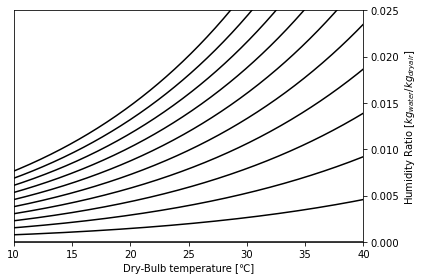

In [55]:
#Youotube from Matplotlib
import psychrolib
import matplotlib.pyplot as plt
import numpy as np

psychrolib.SetUnitSystem(psychrolib.SI)

pressure = 101325

t_array = np.arange(5,45,0.1)
rh_array = np.arange(0,1.1,0.1)
enthalpy_array = np.arange(0,120000,10000)
hr_hor_lines = np.arange(0.005,0.03,0.005)
twb_array = np.arange(-10,45,5)
#箱を生成
f,ax = plt.subplots()
#全体像を生成する。(0℃から45℃の相対湿度の線)
for rh in rh_array:
    rh_array = []
    for t in t_array:
        hr = psychrolib.GetHumRatioFromRelHum(t,rh,pressure)
        rh_array.append(hr)
    ax.plot(t_array,rh_array,"k")
#全体像を生成する。(0℃から45℃の湿球温度の線)
for twb in twb_array:
    hr_array = []
    t_plot_array = []
    for t in t_array:
        if twb <= t:
            #print(twb,t)
            hr = psychrolib.GetHumRatioFromTWetBulb(t,twb,pressure)
            hr_array.append(hr)
            t_plot_array.append(t)
#    ax.plot(t_plot_array,hr_array,"b")
#タイトル等を表示(見せる領域も変化させることが出来る)
ax.set(ylim=(0,0.025),xlim=(10,40),ylabel="Humidity Ratio [$kg_{water}/kg_{dry air}$]",xlabel="Dry-Bulb temperature [℃]")
#ここで向きを変更することが出来る。
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.tight_layout()
plt.show()

In [56]:
#絶対湿度を算出
import numpy as np
import wxparams as wx
#EPWインポート-----------------------------------------------------------------------------
from ladybug.epw import EPW
from pandas import DataFrame
from collections import OrderedDict
#Path to epw file.
epw=EPW("C:/epw_file/JPN_FO_Fukuoka.478070_TMYx.epw")
# die(epw)[::-1] to get data names
data = ["dry_bulb_temperature","dew_point_temperature","relative_humidity","wind_speed"]
epwdf = pd.DataFrame({d:getattr(epw,d).values for d in data})
epwdf
df = epwdf
#------------------------------------------------------------------------------------------
T=df["dry_bulb_temperature"].values
Td=df["dew_point_temperature"].values
AbHumidity=wx.Absolute_Humidity(T,Td,formula="Bolton")
AbHumidity=pd.Series(AbHumidity)
#Pandasのデータに要素を追加
df["absolute_humidity"]=AbHumidity
df

,dry_bulb_temperature,dew_point_temperature,relative_humidity,wind_speed,absolute_humidity
0,9.9,9.2,95,0.7,8.902505
1,6.7,-3.5,46,5.7,3.657233
2,6.8,-3.4,47,5.1,3.683326
3,6.9,-2.3,51,4.1,3.995564
4,7.2,-2.5,49,4.1,3.932638
...,...,...,...,...,...
8755,10.0,8.9,93,3.6,8.721068
8756,10.0,9.0,93,2.7,8.780145
8757,10.0,9.0,94,1.9,8.780145
8758,10.0,9.1,94,1.0,8.839576


C:\Users\81803\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81803\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81803\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81803\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81803\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\81803\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12479 missing from c

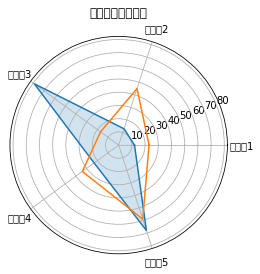

In [57]:
#https://analytics-note.xyz/programming/matplotlib-radar-chart/
import matplotlib.pyplot as plt
import numpy as np

values = np.array([12, 13, 79, 23, 68])  # dataはここ
avevalues = np.array([23,45,17,34,59])
labels = [f"データ{i}" for i in range(1, len(values)+1)]
# 多角形を閉じるためにデータの最後に最初の値を追加する。
radar_values = np.concatenate([values, [values[0]]])
averadar_values = np.concatenate([avevalues, [avevalues[0]]])
# プロットする角度を生成する。
angles = np.linspace(0, 2 * np.pi, len(labels) + 1, endpoint=True)

fig = plt.figure(facecolor="w")
# 極座標でaxを作成。
ax = fig.add_subplot(1, 1, 1, polar=True)
# レーダーチャートの線を引く,外形線のうち、更に外側の線を生成する。
ax.plot(angles, radar_values)
ax.plot(angles, averadar_values)
#　レーダーチャートの内側を塗りつぶす
ax.fill(angles, radar_values, alpha=0.2)
#ax,fill(angles, averadar_values, alpha=0.2)
# 項目ラベルの表示
ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels)

ax.set_title("レーダーチャート", pad=20)
plt.show()

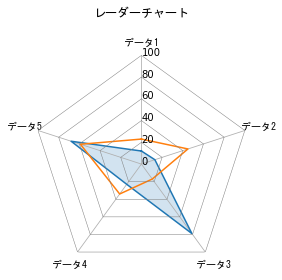

In [58]:
# 多角形を閉じるためにデータの最後に最初の値を追加する。
#!/usr/bin/env python
# -*- coding: utf-8 -*-
radar_values = np.concatenate([values, [values[0]]])
averadar_values = np.concatenate([avevalues, [avevalues[0]]])
# プロットする角度を生成する。
angles = np.linspace(0, 2 * np.pi, len(labels) + 1, endpoint=True)
# メモリ軸の生成
rgrids = [0, 20, 40, 60, 80, 100]


fig = plt.figure(facecolor="w")
# 極座標でaxを作成
ax = fig.add_subplot(1, 1, 1, polar=True)
# レーダーチャートの線を引く
ax.plot(angles, radar_values)
ax.plot(angles, averadar_values)
#　レーダーチャートの内側を塗りつぶす
ax.fill(angles, radar_values, alpha=0.2)
# 項目ラベルの表示
ax.set_thetagrids(angles[:-1] * 180 / np.pi, labels,fontname="MS Gothic")
# 円形の目盛線を消す
ax.set_rgrids([])
# 一番外側の円を消す
ax.spines['polar'].set_visible(False)
# 始点を上(北)に変更
ax.set_theta_zero_location("N")
# 時計回りに変更(デフォルトの逆回り)
ax.set_theta_direction(-1)

# 多角形の目盛線を引く
for grid_value in rgrids:
    grid_values = [grid_value] * (len(labels)+1)
    ax.plot(angles, grid_values, color="gray",  linewidth=0.5)

# メモリの値を表示する
for t in rgrids:
    # xが偏角、yが絶対値でテキストの表示場所が指定される
    ax.text(x=0, y=t, s=t)

# rの範囲を指定
ax.set_rlim([min(rgrids), max(rgrids)])

ax.set_title("レーダーチャート", pad=20,fontname="MS Gothic")
plt.show()

In [ ]:
#Pandasの特定の列の平均値
df["dry_bulb_temperature"].mean()

In [59]:
def PassiveMethodMinuteValue(method):
    PassiveDict={"ActiveSolar":-1.9,"PassiveSolar":2.1,"InternalGain":6.6,"Winter":12.1,"Com1":14.1,"Com2":19.1,"Com3":21.1,"NaturalVentation":26.1}
    #Search=input("ActiveSolar,PassiveSolar,InternalGain,Winter,Com1,Com2,Com3,NaturalVentationから選択：")
    SelectMethod=PassiveDict[str(method)]
    MeanOutdoorTemperature=df["dry_bulb_temperature"].mean()
    ResonValue=SelectMethod+0.31*MeanOutdoorTemperature
    ResonValue=round(ResonValue,2)
    sss="NaturalVentation、Comだったら領域になるので注意"
    return ResonValue,sss
#print(f'最小値は{ResonValue}で、NaturalVentation、Comだったら領域になるので注意')

In [63]:
ActiveSolar=PassiveMethodMinuteValue("ActiveSolar")[0]
PassiveSolar=PassiveMethodMinuteValue("PassiveSolar")[0]
InternalGain=PassiveMethodMinuteValue("InternalGain")[0]
NaturalVentation=PassiveMethodMinuteValue("NaturalVentation")[0]
Winter=PassiveMethodMinuteValue("Winter")[0]
Com1=PassiveMethodMinuteValue("Com1")[0]
Com2=PassiveMethodMinuteValue("Com2")[0]
Com3=PassiveMethodMinuteValue("Com3")[0]
ComHalf=(Com2+Com3)/2
NaturalHalf=(Com3+NaturalVentation)/2
print(type(Com1))

<class 'float'>
